<a href="https://colab.research.google.com/github/SemLy13/currency_converter/blob/main/Cars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
from google.colab import files

In [ ]:
file = files.upload()

Saving CAR_DETAILS_FROM_CAR_DEKHO.csv to CAR_DETAILS_FROM_CAR_DEKHO.csv


In [ ]:
df = pd.read_csv('CAR_DETAILS_FROM_CAR_DEKHO.csv')
ds = df.copy()
df.head(15)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
5,Maruti Alto LX BSIII,2007,140000,125000,Petrol,Individual,Manual,First Owner
6,Hyundai Xcent 1.2 Kappa S,2016,550000,25000,Petrol,Individual,Manual,First Owner
7,Tata Indigo Grand Petrol,2014,240000,60000,Petrol,Individual,Manual,Second Owner
8,Hyundai Creta 1.6 VTVT S,2015,850000,25000,Petrol,Individual,Manual,First Owner
9,Maruti Celerio Green VXI,2017,365000,78000,CNG,Individual,Manual,First Owner


In [ ]:
ds.name = ds.name.apply(lambda x : x.split(' ')[0])
ds.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
ds.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
transformed = ohe.fit_transform(ds[['name']])
# print(transformed.toarray()) выводит матрицу с значениями преобразованных разных видов марок
print(ohe.categories_) #выводит все виды марок
ds[ohe.categories_[0]] = transformed.toarray()
ds.drop('name', axis = 1, inplace = True)

[array(['Ambassador', 'Audi', 'BMW', 'Chevrolet', 'Daewoo', 'Datsun',
       'Fiat', 'Force', 'Ford', 'Honda', 'Hyundai', 'Isuzu', 'Jaguar',
       'Jeep', 'Kia', 'Land', 'MG', 'Mahindra', 'Maruti', 'Mercedes-Benz',
       'Mitsubishi', 'Nissan', 'OpelCorsa', 'Renault', 'Skoda', 'Tata',
       'Toyota', 'Volkswagen', 'Volvo'], dtype=object)]


In [ ]:
transformed = ohe.fit_transform(ds[['fuel']])
# print(transformed.toarray()) выводит матрицу с значениями преобразованных разных видов топлива
print(ohe.categories_) #выводит все виды топлива
ds[ohe.categories_[0]] = transformed.toarray()
ds.drop('fuel', axis = 1, inplace = True)

[array(['CNG', 'Diesel', 'Electric', 'LPG', 'Petrol'], dtype=object)]


In [ ]:
transformed = ohe.fit_transform(ds[['seller_type']])
# print(transformed.toarray()) выводит матрицу с значениями преобразованных разных видов продавцов
print(ohe.categories_) #выводит все виды продавцов
ds[ohe.categories_[0]] = transformed.toarray()
ds.drop('seller_type', axis = 1, inplace = True)

[array(['Dealer', 'Individual', 'Trustmark Dealer'], dtype=object)]


In [ ]:
transformed = ohe.fit_transform(ds[['transmission']])
# print(transformed.toarray()) выводит матрицу с значениями преобразованных разных видов коробка передач
print(ohe.categories_) #выводит все виды коробки передач
ds[ohe.categories_[0]] = transformed.toarray()
ds.drop('transmission', axis = 1, inplace = True)

[array(['Automatic', 'Manual'], dtype=object)]


In [ ]:
transformed = ohe.fit_transform(ds[['owner']])
# print(transformed.toarray()) выводит матрицу с значениями преобразованных разных видов количества владельцев
print(ohe.categories_) #выводит все виды количеств владьцев
ds[ohe.categories_[0]] = transformed.toarray()
ds.drop('owner', axis = 1, inplace = True)

[array(['First Owner', 'Fourth & Above Owner', 'Second Owner',
       'Test Drive Car', 'Third Owner'], dtype=object)]


In [ ]:
ds.year = 2022 - ds.year
ds.shape

(4340, 47)

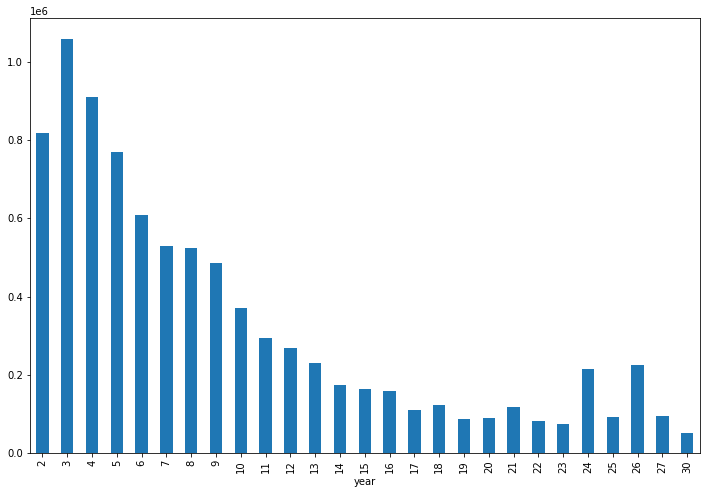

In [ ]:
import matplotlib.pyplot as plt 
plt.figure(figsize = (12, 8))
ds.groupby('year').mean().selling_price.plot(kind = 'bar')

In [ ]:
ds.head()

,year,selling_price,km_driven,Ambassador,Audi,BMW,Chevrolet,Daewoo,Datsun,Fiat,...,Dealer,Individual,Trustmark Dealer,Automatic,Manual,First Owner,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner
0,15,60000,70000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,15,135000,50000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,10,600000,100000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,5,250000,46000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,8,450000,141000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
print(sorted(ds.selling_price)) #цены машин сортированные по возрастанию

[20000, 22000, 30000, 35000, 35000, 35000, 37500, 40000, 40000, 40000, 40000, 40000, 40000, 42000, 42000, 43000, 45000, 45000, 45000, 45000, 45000, 45000, 45000, 45000, 48000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 51111, 52000, 52000, 52000, 52000, 55000, 55000, 55000, 55000, 55000, 55000, 55000, 55000, 55000, 55000, 56000, 56000, 57000, 58000, 58000, 60000, 60000, 60000, 60000, 60000, 60000, 60000, 60000, 60000, 60000, 60000, 60000, 60000, 60000, 60000, 60000, 60000, 60000, 60000, 60000, 60000, 60000, 60000, 61000, 61000, 61000, 62000, 65000, 65000, 65000, 65000, 65000, 65000, 65000, 65000, 65000, 65000, 65000, 65000, 65000, 68000, 68000, 68000, 68000, 69000, 69000, 69000, 70000, 70000, 70000, 70000, 70000, 70000, 70000, 70000, 70000, 70000, 70000, 70000, 70000, 70000, 70000, 70000, 70000, 70000, 70000, 70000, 70000, 70000, 70000, 70000, 70000, 70000, 70000, 70000, 70000, 70000, 70000, 70000, 70000, 71000, 72000, 72000, 73000, 73000

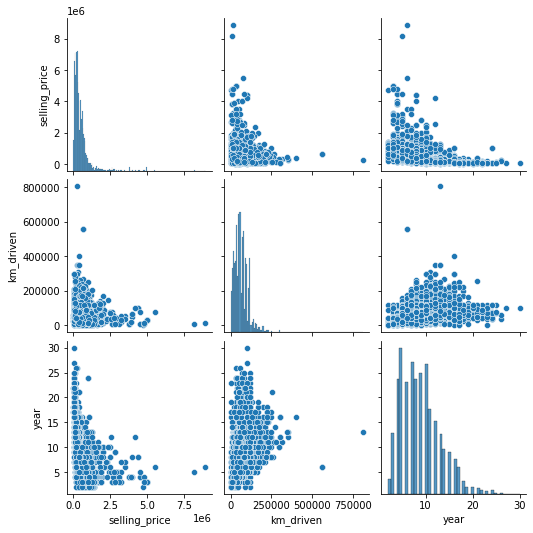

In [ ]:
graph = ds[['selling_price', 'km_driven', 'year']]
sns.pairplot(graph)

In [ ]:
ds.columns

Index(['year', 'selling_price', 'km_driven', 'Ambassador', 'Audi', 'BMW',
       'Chevrolet', 'Daewoo', 'Datsun', 'Fiat', 'Force', 'Ford', 'Honda',
       'Hyundai', 'Isuzu', 'Jaguar', 'Jeep', 'Kia', 'Land', 'MG', 'Mahindra',
       'Maruti', 'Mercedes-Benz', 'Mitsubishi', 'Nissan', 'OpelCorsa',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo', 'CNG',
       'Diesel', 'Electric', 'LPG', 'Petrol', 'Dealer', 'Individual',
       'Trustmark Dealer', 'Automatic', 'Manual', 'First Owner',
       'Fourth & Above Owner', 'Second Owner', 'Test Drive Car',
       'Third Owner'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error
y = ds['selling_price']
x = ds[['year', 'km_driven', 'Ambassador', 'Audi', 'BMW',
       'Chevrolet', 'Daewoo', 'Datsun', 'Fiat', 'Force', 'Ford', 'Honda',
       'Hyundai', 'Isuzu', 'Jaguar', 'Jeep', 'Kia', 'Land', 'MG', 'Mahindra',
       'Maruti', 'Mercedes-Benz', 'Mitsubishi', 'Nissan', 'OpelCorsa',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo', 'CNG',
       'Diesel', 'Electric', 'LPG', 'Petrol', 'Dealer', 'Individual',
       'Trustmark Dealer', 'Automatic', 'Manual', 'First Owner',
       'Fourth & Above Owner', 'Second Owner', 'Test Drive Car', 'Third Owner']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 13)

In [ ]:
rez = []
model = LinearRegression(fit_intercept = True)
model.fit(x_train, y_train)
rez.append(mean_absolute_error(y_test, model.predict(x_test)))
mean_absolute_error(y_test, model.predict(x_test))

179338.98274931443

In [ ]:
koef = [0.1, 0.5, 1, 2, 5, 10]
for i in koef:
  model = Lasso(alpha = i, fit_intercept = True)
  model.fit(x_train, y_train)
  rez.append(mean_absolute_error(y_test, model.predict(x_test)))
  print(mean_absolute_error(y_test, model.predict(x_test)))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.516e+13, tolerance: 1.210e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


179849.95867494855


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.517e+13, tolerance: 1.210e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


179847.32024087466


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.387e+13, tolerance: 1.210e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


179844.2112570833


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.713e+11, tolerance: 1.210e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


179841.3735772979


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.839e+11, tolerance: 1.210e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


179838.11453580295
179833.10040628226


In [ ]:
for i in koef:
  model = Ridge(alpha = i, fit_intercept = True)
  model.fit(x_train, y_train)
  rez.append(mean_absolute_error(y_test, model.predict(x_test)))
  print(mean_absolute_error(y_test, model.predict(x_test)))

179240.05327274028
178943.27514363886
178824.12241436183
178775.22633849346
179285.94914944627
181479.261026644


In [ ]:
rez.sort()
print(rez[0])

178775.22633849346


In [ ]:
model = Ridge(alpha = 2, fit_intercept = True)
model.fit(x_train, y_train)
dat = x_test[['Manual', 'year']]
dat['truevalue'] = y_test
dat['pred'] = model.predict(x_test).astype(int)
dat.head(50)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Manual,year,truevalue,pred
1685,1.0,9,370000,428912
3363,1.0,6,750000,485788
1365,1.0,16,300000,53276
4274,0.0,4,1100000,1021410
388,1.0,16,90000,-20183
1286,1.0,6,850000,601613
909,1.0,7,750000,799953
3124,1.0,7,535000,543948
1367,1.0,7,530000,525693
3671,1.0,8,185000,504838


In [ ]:
mean_absolute_error(y_test, model.predict(x_test))

178775.22633849346

In [ ]:
model.coef_

array([-3.94154942e+04, -9.12762878e-01, -2.51383249e+05,  6.77540505e+05,
        1.56082860e+06, -5.76463871e+05, -9.88206179e+04, -6.08544235e+05,
       -5.35807496e+05, -2.25236060e+05, -3.99306523e+05, -3.88514964e+05,
       -4.64712053e+05,  0.00000000e+00,  5.15935887e+05,  2.40981320e+05,
       -9.47263500e+04,  1.64347235e+06,  2.54311959e+05, -3.64283535e+05,
       -4.78396973e+05,  1.44986120e+06, -1.42174008e+04, -4.53716510e+05,
       -1.31369651e+05, -5.64905945e+05, -4.67325466e+05, -5.64089963e+05,
       -2.72924176e+04, -4.74919930e+05,  8.41101379e+05, -1.07912599e+04,
        1.70994538e+05, -1.62274288e+05,  1.19419355e+04, -9.87092558e+03,
       -6.44855055e+04, -8.02307542e+04,  1.44716260e+05,  1.70138908e+05,
       -1.70138908e+05, -2.28035842e+04, -9.24209720e+03, -6.77529683e+04,
        1.58808122e+05, -5.90094727e+04])